# Map with locations

Here follows a template for a map with locations of choice

Import all the required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import cmocean as cm
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
exec(open('/home/koehne/Documents/scripts/python/martinfr/myromstools.py').read()) # import compute_zlev, compute_dz
exec(open('/nas/meilers/Documents/MScThesis/Python/functions/ext_events_dict/ext_events.py').read())

Define variables:

In [2]:
depths = [100,400]
thresholds = [60,22,5]
threshold = thresholds[0]
variable = 'O2'

Read grid:

In [3]:
gridfile = '/net/kryo/work/koehne/roms/inputs/humpac15/N64ts10tb4hc250_grd_merged_SiO3_PO4_fix/grd/humpac15_grd.nc'
romsGrd = getGrid(gridfile)
# Add necessary attributes
filepath = '/net/kryo/work/koehne/roms/output/humpac15/N64ts10tb4hc250_grd_merged_SiO3_PO4_fix/humpac15_hindcast_1979_2016_6/daily/avg/'
romsGrd.getAttrs(filepath+'humpac15_2006_avg.nc')
# Add lat lon
romsGrd.getLatLon()
# Add grid area
romsGrd.getArea()
# Add angle
romsGrd.getAngle()

grid = xr.open_dataset(gridfile)

mask = np.zeros_like(grid.mask_rho) + np.NaN
mask[grid.mask_rho==1] = 1

Read in data (takes some time):

In [4]:
depth = depths[0]
years = np.arange(2006,2010)

# Open dataset and save all O2 timeseries
i = 0
for year in years:
    data = xr.open_dataset('/net/kryo/work/koehne/roms/output/humpac15/N64ts10tb4hc250_grd_merged_SiO3_PO4_fix/humpac15_hindcast_1979_2016_6/daily/avg_zslice/'+str(variable)+'_'+str(depth)+'/z_humpac15_'+str(year)+'_avg_'+variable+'_'+str(depth)+'.nc')
    if i == 0:
        print(year)
        O2_timeseries = data.O2.values[:,:,:]
    else:
        print(year)
        O2_copy = np.append(O2_timeseries,data.O2.values[:,:,:],axis=0)
        O2_timeseries = O2_copy
        print(np.shape(O2_timeseries))
    data.close()
    i += 1
    
del O2_copy

2006
2007
(730, 1009, 701)
2008
(1096, 1009, 701)
2009
(1461, 1009, 701)


Define and select grid points of interest:

In [5]:
eta_vec = [150,115,507,311,455,685] #create a vector with a series of points to plot
xi_vec = [383,301,287,559,509,365] #points of interest - South: in OMZ, border, out of OMZ; North: im OMZ, border, out of OMZ
pos = 1 # 0=S in OMZ, 1=S border, 2=S out of OMZ, 3=N in OMZ, 4=N border, 5=N out of OMZ
eta_rho_cho = eta_vec[pos] # j in ncview
xi_rho_cho = xi_vec[pos] # i in ncview
lon_chosen = romsGrd.lon_rho[eta_rho_cho,xi_rho_cho]
lat_chosen = romsGrd.lat_rho[eta_rho_cho,xi_rho_cho]

pos_plot = [0,1,2,3,4,5]
lon_cho_plot = np.zeros(len(pos_plot))
lat_cho_plot = np.zeros(len(pos_plot))
for i in pos_plot:
    eta_rho_cho_plot = eta_vec[pos_plot[i]]
    xi_rho_cho_plot = xi_vec[pos_plot[i]]
    lon_cho_plot[i] = romsGrd.lon_rho[eta_rho_cho_plot,xi_rho_cho_plot]
    lat_cho_plot[i] = romsGrd.lat_rho[eta_rho_cho_plot,xi_rho_cho_plot]


o2 = O2_timeseries[:,eta_rho_cho,xi_rho_cho]
o2_detrend = sig.detrend(o2,axis=0)

Finally, make the plot:

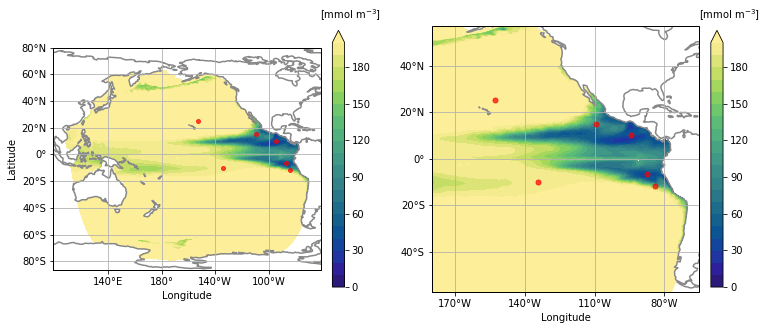

In [6]:
O2_mean = np.mean(O2_timeseries[:,:,:],axis=0)
fig,ax = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}, figsize=(12,6))
plt.subplots_adjust(wspace=0.3)
ax[0].coastlines(color='#888888',linewidth=1.5)
c0 = ax[0].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb0 = plt.colorbar(c0,ax=ax[0], fraction=0.042, pad=0.04)
cb0.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[0].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=4,
             alpha=0.7, transform=ccrs.Geodetic())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].xaxis.set_major_formatter(lon_formatter)
ax[0].yaxis.set_major_formatter(lat_formatter)
ax[0].set_xticks([140, 180, 220, 260], crs=ccrs.PlateCarree())
ax[0].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid()
ax[1].coastlines(color='#888888',linewidth=1.5)
c1 = ax[1].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb1 = plt.colorbar(c1,ax=ax[1], fraction=0.042, pad=0.04)
cb1.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[1].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=5,
             alpha=0.7, transform=ccrs.Geodetic())
ax[1].xaxis.set_major_formatter(lon_formatter)
ax[1].yaxis.set_major_formatter(lat_formatter)
ax[1].set_xticks([190, 220, 250, 280], crs=ccrs.PlateCarree())
ax[1].set_yticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())
ax[1].set_extent([180-360, 295-360, -40, 40])
ax[1].set_xlabel('Longitude')
#ax[1].set_ylabel('Latitude')
ax[1].grid()
plt.savefig('/nas/meilers/Documents/MScThesis/Python/humpac15_hindcast_06_analysis/O2ExtremeEventAnalysis/plots/humpac15_hindcast_06_O2ExtremeEventsAnalysis/locations.png',bbox_inches='tight', dpi=300)

plt.show()


In [7]:
eta_vec = [150,311] #create a vector with a series of points to plot
xi_vec = [383,559] #points of interest - South: in OMZ, border, out of OMZ; North: im OMZ, border, out of OMZ
pos = 1 # 0=S in OMZ, 1=S border, 2=S out of OMZ, 3=N in OMZ, 4=N border, 5=N out of OMZ
eta_rho_cho = eta_vec[pos] # j in ncview
xi_rho_cho = xi_vec[pos] # i in ncview
lon_chosen = romsGrd.lon_rho[eta_rho_cho,xi_rho_cho]
lat_chosen = romsGrd.lat_rho[eta_rho_cho,xi_rho_cho]

pos_plot = [0,1]
lon_cho_plot = np.zeros(len(pos_plot))
lat_cho_plot = np.zeros(len(pos_plot))
for i in pos_plot:
    eta_rho_cho_plot = eta_vec[pos_plot[i]]
    xi_rho_cho_plot = xi_vec[pos_plot[i]]
    lon_cho_plot[i] = romsGrd.lon_rho[eta_rho_cho_plot,xi_rho_cho_plot]
    lat_cho_plot[i] = romsGrd.lat_rho[eta_rho_cho_plot,xi_rho_cho_plot]


o2 = O2_timeseries[:,eta_rho_cho,xi_rho_cho]
o2_detrend = sig.detrend(o2,axis=0)

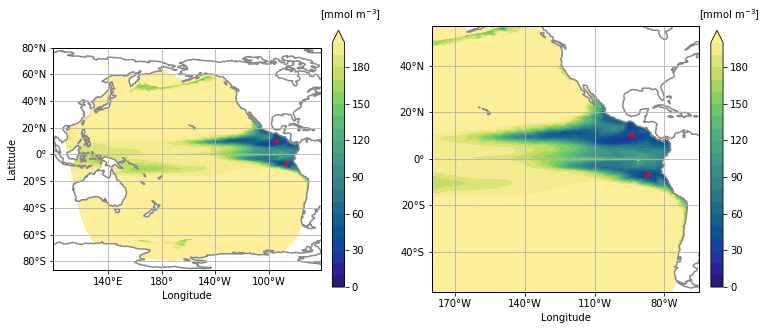

In [8]:
O2_mean = np.mean(O2_timeseries[:,:,:],axis=0)
fig,ax = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}, figsize=(12,6))
plt.subplots_adjust(wspace=0.3)
ax[0].coastlines(color='#888888',linewidth=1.5)
c0 = ax[0].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb0 = plt.colorbar(c0,ax=ax[0], fraction=0.042, pad=0.04)
cb0.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[0].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=4,
             alpha=0.7, transform=ccrs.Geodetic())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].xaxis.set_major_formatter(lon_formatter)
ax[0].yaxis.set_major_formatter(lat_formatter)
ax[0].set_xticks([140, 180, 220, 260], crs=ccrs.PlateCarree())
ax[0].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid()
ax[1].coastlines(color='#888888',linewidth=1.5)
c1 = ax[1].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb1 = plt.colorbar(c1,ax=ax[1], fraction=0.042, pad=0.04)
cb1.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[1].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=5,
             alpha=0.7, transform=ccrs.Geodetic())
ax[1].xaxis.set_major_formatter(lon_formatter)
ax[1].yaxis.set_major_formatter(lat_formatter)
ax[1].set_xticks([190, 220, 250, 280], crs=ccrs.PlateCarree())
ax[1].set_yticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())
ax[1].set_extent([180-360, 295-360, -40, 40])
ax[1].set_xlabel('Longitude')
#ax[1].set_ylabel('Latitude')
ax[1].grid()
plt.savefig('/nas/meilers/Documents/MScThesis/Python/humpac15_hindcast_06_analysis/O2ExtremeEventAnalysis/plots/humpac15_hindcast_06_O2ExtremeEventsAnalysis/locations_2.png',bbox_inches='tight', dpi=300)

plt.show()


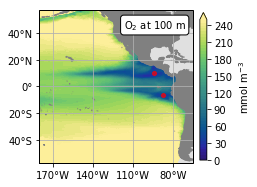

In [21]:
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig,ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}, figsize=(3,4))
ax.coastlines(color='#888888',linewidth=1.5)
ax.imshow(np.tile(np.array([[[224, 224, 224]]], dtype=np.uint8), [2, 2, 1]), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -180, 180])
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='#808080'))
c0 = ax.contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,250,51), cmap=cm.cm.haline, extend='max')
cb0 = plt.colorbar(c0,ax=ax, fraction=0.042, pad=0.04)
cb0.set_label('mmol m$^{-3}$', y=0.5, rotation=90)
ax.text(0.75,0.9, r'O$_2$ at 100 m', transform=ax.transAxes, size=10, rotation=0.,ha="center", va="center",bbox=dict(boxstyle="round",facecolor='w'))
for i in pos_plot:
    ax.plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=4,
             alpha=0.7, transform=ccrs.Geodetic())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks([190, 220, 250, 280], crs=ccrs.PlateCarree())
ax.set_yticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())
ax.set_extent([180-360, 295-360, -40, 40])
ax.grid()
plt.savefig('/nas/meilers/Documents/MScThesis/Python/humpac15_hindcast_06_analysis/O2ExtremeEventAnalysis/plots/humpac15_hindcast_06_O2ExtremeEventsAnalysis/locations_2.png',bbox_inches='tight', dpi=300)

plt.show()


Try a few new points

In [ ]:
eta_vec = [150,200,220,311,350,400] #create a vector with a series of points to plot
xi_vec = [383,400,420,559,500,550] #points of interest - South: in OMZ, border, out of OMZ; North: im OMZ, border, out of OMZ
pos = 1 # 0=S in OMZ, 1=S border, 2=S out of OMZ, 3=N in OMZ, 4=N border, 5=N out of OMZ
eta_rho_cho = eta_vec[pos] # j in ncview
xi_rho_cho = xi_vec[pos] # i in ncview
lon_chosen = romsGrd.lon_rho[eta_rho_cho,xi_rho_cho]
lat_chosen = romsGrd.lat_rho[eta_rho_cho,xi_rho_cho]

pos_plot = [0,1,2,3,4,5]
lon_cho_plot = np.zeros(len(pos_plot))
lat_cho_plot = np.zeros(len(pos_plot))
for i in pos_plot:
    eta_rho_cho_plot = eta_vec[pos_plot[i]]
    xi_rho_cho_plot = xi_vec[pos_plot[i]]
    lon_cho_plot[i] = romsGrd.lon_rho[eta_rho_cho_plot,xi_rho_cho_plot]
    lat_cho_plot[i] = romsGrd.lat_rho[eta_rho_cho_plot,xi_rho_cho_plot]


o2 = O2_timeseries[:,eta_rho_cho,xi_rho_cho]
o2_detrend = sig.detrend(o2,axis=0)

In [ ]:
O2_mean = np.mean(O2_timeseries[:,:,:],axis=0)
fig,ax = plt.subplots(1,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}, figsize=(12,6))
plt.subplots_adjust(wspace=0.3)
ax[0].coastlines(color='#888888',linewidth=1.5)
c0 = ax[0].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb0 = plt.colorbar(c0,ax=ax[0], fraction=0.042, pad=0.04)
cb0.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[0].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=4,
             alpha=0.7, transform=ccrs.Geodetic())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].xaxis.set_major_formatter(lon_formatter)
ax[0].yaxis.set_major_formatter(lat_formatter)
ax[0].set_xticks([140, 180, 220, 260], crs=ccrs.PlateCarree())
ax[0].set_yticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid()
ax[1].coastlines(color='#888888',linewidth=1.5)
c1 = ax[1].contourf(grid.lon_rho-180,grid.lat_rho,O2_mean*mask,levels=np.linspace(0,200,21), cmap=cm.cm.haline, extend='max')
cb1 = plt.colorbar(c1,ax=ax[1], fraction=0.042, pad=0.04)
cb1.set_label('[mmol m$^{-3}$]',labelpad=-20, y=1.09, rotation=0)
for i in pos_plot:
    ax[1].plot(lon_cho_plot[i],lat_cho_plot[i], marker='o', color='red', markersize=5,
             alpha=0.7, transform=ccrs.Geodetic())
ax[1].xaxis.set_major_formatter(lon_formatter)
ax[1].yaxis.set_major_formatter(lat_formatter)
ax[1].set_xticks([190, 220, 250, 280], crs=ccrs.PlateCarree())
ax[1].set_yticks([-40, -20, 0, 20, 40], crs=ccrs.PlateCarree())
ax[1].set_extent([180-360, 295-360, -40, 40])
ax[1].set_xlabel('Longitude')
#ax[1].set_ylabel('Latitude')
ax[1].grid()
#plt.savefig('/nas/meilers/Documents/MScThesis/Python/humpac15_hindcast_06_analysis/O2ExtremeEventAnalysis/plots/humpac15_hindcast_06_O2ExtremeEventsAnalysis/locations.png',bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
romspath = '/net/kryo/work/koehne/roms/output/humpac15/N64ts10tb4hc250_grd_merged_SiO3_PO4_fix/humpac15_hindcast_1979_2016_6/monthly/avg_zslice/O2_100/'
romsfile = 'z_humpac15_avg_clim.nc'
romsdata = xr.open_dataset(romspath+romsfile)

# chose area of interest here
eta_low = 5
eta_high = 45
xi_low = 200
xi_high = 400

fig = plt.figure(figsize=(15,11))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.coastlines(color='#888888',linewidth=1.5)
rda = romsdata.variables['O2'][:,:,:]
c0 = ax.contourf(grid.lon_rho-360.,grid.lat_rho,rda.mean(axis=0)*mask,levels=np.linspace(0,250,51),transform=ccrs.PlateCarree())
ax.text(0.85,0.5, r'O$_2$ at 100 m', transform=ax.transAxes, size=12, rotation=0.,ha="center", va="center",bbox=dict(boxstyle="round",facecolor='w'))
ax.set_xticks([270, 280, 290], crs=ccrs.PlateCarree())
ax.set_yticks([-30, -20, -10, 0, 10], crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cb = plt.colorbar(c0)
cb.set_label('mmol m$^{-3}$', labelpad=-40, y=1.03, rotation=0)
plt.plot(grid.lon_rho[eta_low,xi_low:xi_high],grid.lat_rho[eta_low,xi_low:xi_high],'C3',linewidth=2,transform=ccrs.PlateCarree())
plt.plot(grid.lon_rho[eta_high,xi_low:xi_high],grid.lat_rho[eta_high,xi_low:xi_high],'C3',linewidth=2,transform=ccrs.PlateCarree())
plt.plot(grid.lon_rho[eta_low:eta_high,xi_low],grid.lat_rho[eta_low:eta_high,xi_low],'C3',linewidth=2,transform=ccrs.PlateCarree())
plt.plot(grid.lon_rho[eta_low:eta_high,xi_high],grid.lat_rho[eta_low:eta_high,xi_high],'C3',linewidth=2,transform=ccrs.PlateCarree())
ax.set_extent([260-360, 295-360, -40, 20])
plt.show()
